<a href="https://colab.research.google.com/github/louispaulet/Classfication_and_Representation_Learning_course/blob/main/CLR_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries and data.txt from Google Drive

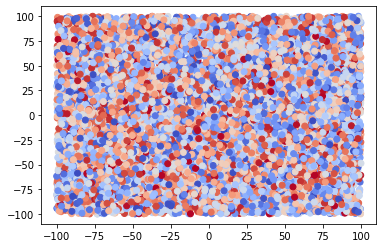

In [ ]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from google.colab import files


matrix_pos = np.loadtxt(open('data.txt'),delimiter=',')

def display_cells(cell_matrix):
  #get x and y coords from matrix
  x = cell_matrix[:, 1]
  y = cell_matrix[:, 2]
  c = cell_matrix[:, 3]
  print(plt.scatter(x, y,c=c, cmap=cm.coolwarm))

display_cells(matrix_pos)

Functions below are defined separately for easier testing. 

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

#project parameters
current_coords = [[0, 0]]
time_left = 10000
score = 0
eaten_list = []

def find_closest_cell(cell_matrix, position):
  #compute distances between all cells and current point
  distances = euclidean_distances(cell_matrix[:, 1:3], position)

  if (np.shape(cell_matrix)[1] == 5):
    cell_matrix = np.delete(cell_matrix, 4, 1)
  matrix_distances = np.c_[cell_matrix, distances]

  #get index at which the smallest distance is located
  id = np.where(matrix_distances[:, 4] == np.amin(matrix_distances[:, 4]))[0][0]

  return id, matrix_distances

# id, matrix_pos = find_closest_cell(matrix_pos, position)

The eat_cell function below performs the "eat" and "move" actions at the same time.

In [ ]:
def eat_cell(id, time_left, score, eaten_list, cell_matrix, default_position):
  if (time_left - cell_matrix[id][4]) > 0: 
    time_left -= cell_matrix[id][4] #remove time-distance
    score += cell_matrix[id][3] #add score
    current_coords = [[cell_matrix[id][1], cell_matrix[id][2]]] #update position
    eaten_list = np.append(eaten_list, cell_matrix[id][0]) #add cell id to the kill list
    cell_matrix = np.delete(cell_matrix, (id), axis=0) #remove eaten cell
  else:
    current_coords = default_position #case where we can't eat a cell
  return time_left, score, current_coords, eaten_list, cell_matrix

The main game loop runs the algorithm until the limits are reached :


*   time_left is the time specified comes from project specifications and is 10 000
*   time_out is a variable that is incremented when a game loop is performed, whether an action was taken or not. It prevents infinite loops.
*   shape of the matrix tells us whether there are cells remaining to be eaten




In [ ]:
time_out = 10000 # worst case scenario emergency exit

#game loop
while(time_left > 0 and time_out > 0 and np.shape(matrix_pos)[0] != 0):

  id, matrix_pos = find_closest_cell(matrix_pos, current_coords)
  default_position = current_coords
  time_left, score, current_coords, eaten_list, matrix_pos = eat_cell(id, time_left, score, eaten_list, matrix_pos, default_position)
  time_out -= 1

time_left, score, current_coords,time_out, eaten_list

(0.9506024777473439,
 327584.0,
 [[54.41, 62.68]],
 0,
 array([5478., 8498.,  220., ..., 7321., 6383., 3501.]))

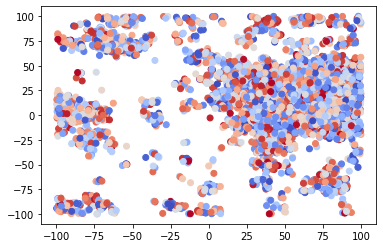

In [ ]:
#display final matrix
display_cells(matrix_pos)

In [ ]:
#export text file
eaten_list = eaten_list.astype(int)
np.savetxt(fname="output.csv", delimiter=",",fmt='%i', X=eaten_list)
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
eaten_list

array([5478, 8498,  220, ..., 7321, 6383, 3501])